<a href="https://colab.research.google.com/github/lailadwikartikasari/CV-Laila-Dwi-Kartika-Sari/blob/main/OBESITYKU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split


In [55]:
path_dataset = "/content/obesity_data.csv"

In [56]:
df = pd.read_csv(path_dataset)

In [57]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [87]:
print("Jumlah nilai yang hilang di setiap kolom:\n", df.isnull().sum())

Jumlah nilai yang hilang di setiap kolom:
 Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64


In [102]:

# Misalkan df adalah DataFrame yang sudah Anda siapkan
df = pd.read_csv('/content/obesity_data.csv')

# Pastikan kolom target ada dalam DataFrame
if 'ObesityCategory' not in df.columns:
    raise ValueError("Kolom 'ObesityCategory' tidak ditemukan dalam DataFrame.")

# Konversi kolom gender dari string ke angka
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 2})  # Ganti sesuai dengan representasi yang diinginkan

# Standarisasi fitur, gunakan semua kolom kecuali kolom target
scaled_features = StandardScaler().fit_transform(df[['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']])

# Terapkan SMOTE-ENN
SE = SMOTEENN()
x_se, y_se = SE.fit_resample(scaled_features, df['ObesityCategory'])

# Tampilkan hasil sebelum dan setelah SMOTE-ENN
print('Data Sebelum dilakukan Hybrid Sampling SMOTE-ENN: \n', pd.Series(df['ObesityCategory']).value_counts())
print('Hasil Hybrid Sampling SMOTE-ENN pada Dataset: \n', pd.Series(y_se).value_counts())

Data Sebelum dilakukan Hybrid Sampling SMOTE-ENN: 
 ObesityCategory
Normal weight    371
Overweight       295
Obese            191
Underweight      143
Name: count, dtype: int64
Hasil Hybrid Sampling SMOTE-ENN pada Dataset: 
 ObesityCategory
Underweight      344
Obese            326
Normal weight    242
Overweight       242
Name: count, dtype: int64


In [104]:
x_train, x_test, y_train, y_test = train_test_split(x_se, y_se, test_size=0.20, random_state=0)

In [105]:

nb = GaussianNB()
nb.fit(x_train, y_train)


y_pred = nb.predict(x_test)

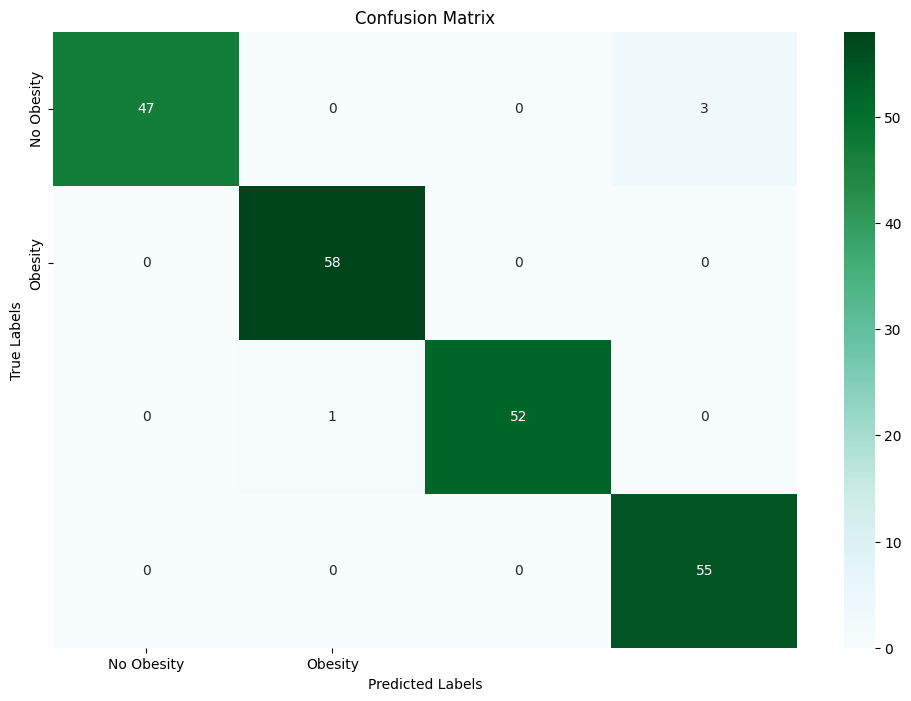

Classification Report Naive Bayes:
                precision    recall  f1-score   support

Normal weight       1.00      0.94      0.97        50
        Obese       0.98      1.00      0.99        58
   Overweight       1.00      0.98      0.99        53
  Underweight       0.95      1.00      0.97        55

     accuracy                           0.98       216
    macro avg       0.98      0.98      0.98       216
 weighted avg       0.98      0.98      0.98       216

Akurasi Naive Bayes:  0.9814814814814815


In [111]:

# Persiapkan data fitur dan target
X = df[['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']]
y = df['ObesityCategory']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Resampling data menggunakan SMOTEENN
smoteenn = SMOTEENN()
X_resampled, y_resampled = smoteenn.fit_resample(X_scaled, y)

# Under-sampling tambahan menggunakan RandomUnderSampler jika diperlukan
under_sampler = RandomUnderSampler()
X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Latih model
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi hasil menggunakan model yang sudah dilatih
y_pred = model.predict(X_test)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='BuGn', xticklabels=['No Obesity', 'Obesity'], yticklabels=['No Obesity', 'Obesity'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Tampilkan classification report dan akurasi
print("Classification Report Naive Bayes:\n", classification_report(y_test, y_pred))
print("Akurasi Naive Bayes: ", accuracy_score(y_test, y_pred))